In [168]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats

import math

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# !pip install notebook-as-pdf

# Objective of this case study is :
### 1. which are important factors (features) for admissions
### 2. Is there any relation among these factors?
### 3. Given all these features, predict one's chance of admissions

# Discussion

### For solving the problem, we can check following:
### 1. EDA on input features (shape, missing value, conclusions from univariate and bivariate analysis)
### 2. Correlation among input features
### 3. Check assumptions of Linear regression
### 4. Build model and optimise for choosen metric
### 5. important features driving chance of admissions

# Metric discussion
### As we are trying to predict a continous variable, this is a regression problem.
### We are trying to optimize for MSE in the loss function, so possible metric for optimization can be:
### MAE, RMSE, R2, Adj-R2 : Out of these, we will try to compare models based on adjusted-R2 as it penalizes model for using extra feature and it also considers r2. 



In [169]:
df = pd.read_excel('graduate_admission_data.xlsx')

In [170]:
df.shape

(500, 9)

In [171]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [172]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [173]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [174]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [175]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [176]:
serial_num_lst = list(df['Serial No.'])
df.drop(columns = 'Serial No.', axis=1, inplace=True)

In [177]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Few quick observations: 
### 1. There are 500 rows and 9 columns
### 2. No missing data
### 3. All the columns are of integer or float data types

### This notebook is divided into 3 sections: 
### Section1: gives basic EDA to determine factors affecting the chances of admission. It is further divided into Univariate and Bivariate sections. 
### Section2: focuses on model building 
### Section3: recommendation and insights


# Section-1: Lets do EDA to understand the data

### univariate analysis

### 1. 	GRE Score (range: 290-340)

In [178]:
df['GRE Score'].describe()

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

<Figure size 720x720 with 0 Axes>

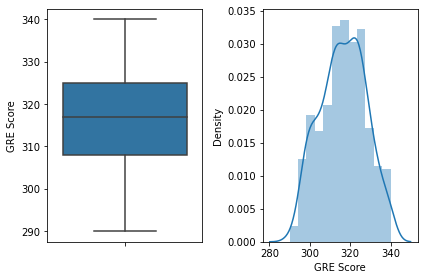

In [179]:
plt.figure(figsize=(10,10))
fig, ax =plt.subplots(1,2)
sns.boxplot(y = df['GRE Score'], ax = ax[0])
sns.distplot(df['GRE Score'], ax= ax[1])
plt.tight_layout()
plt.show()

### We dont see any outlier in the data as mean and median (50%) values are similar (at 316 GRE score). 
### We can check later if higher value of GRE score drives chances of admission or vice-versa

### 2. TOEFL Score (range: 92-120)

In [180]:
df['TOEFL Score'].describe()

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

<Figure size 720x720 with 0 Axes>

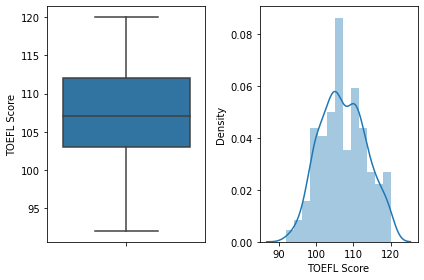

In [181]:
plt.figure(figsize=(10,10))
fig, ax =plt.subplots(1,2)
sns.boxplot(y = df['TOEFL Score'], ax = ax[0])
sns.distplot(df['TOEFL Score'], ax= ax[1])
plt.tight_layout()
plt.show()

### We dont see any outlier in the data as mean and median (50%) values are similar (at 107 TOEFL score). 
### We can check later if higher value of TOEFL score drives chances of admission or vice-versa

### 3. University Rating (range 0-5)

In [182]:
df['University Rating'].describe()

count    500.000000
mean       3.114000
std        1.143512
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University Rating, dtype: float64

<AxesSubplot:xlabel='University Rating', ylabel='count'>

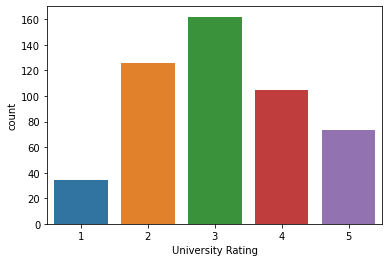

In [183]:
sns.countplot(df['University Rating'])

### we can see more often university ranking of 3 is present in data

### 4. SOP

In [184]:
df['SOP'].describe()

count    500.000000
mean       3.374000
std        0.991004
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64

<AxesSubplot:xlabel='SOP', ylabel='count'>

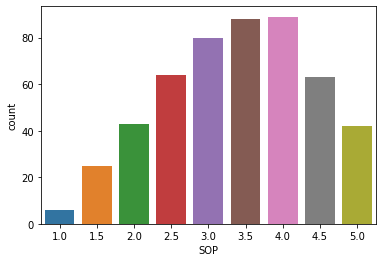

In [185]:
sns.countplot(df['SOP'])

### more often, SOP value of 3-4 is present. Lets see if higher SOP value drives chances of admissions

### 5. LOR

In [186]:
df['LOR'].describe()

count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: LOR, dtype: float64

<AxesSubplot:xlabel='LOR', ylabel='count'>

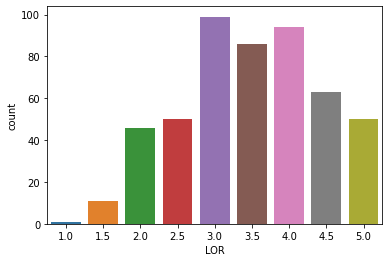

In [187]:
sns.countplot(df['LOR'])

### more often, LOR value of 3-4 is present. Lets see if higher LOR value drives chances of admissions

### 6. CGPA

In [188]:
df['CGPA'].describe()

count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: CGPA, dtype: float64

<Figure size 720x720 with 0 Axes>

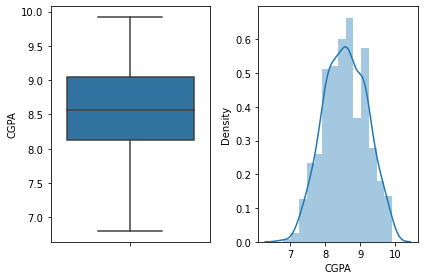

In [189]:
plt.figure(figsize=(10,10))
fig, ax =plt.subplots(1,2)
sns.boxplot(y = df['CGPA'], ax = ax[0])
sns.distplot(df['CGPA'], ax= ax[1])
plt.tight_layout()
plt.show()

### We dont see any outlier in the data as mean and median (50%) values are similar (at 8.5 CGPA). 
### We can check later if higher value of CGPA score drives chances of admission or vice-versa

### 7. Research

In [190]:
df['Research'].describe()

count    500.000000
mean       0.560000
std        0.496884
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64

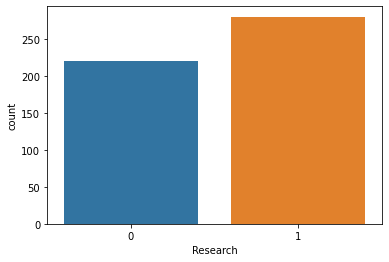

In [191]:
sns.countplot(df['Research'])
plt.show()

### we can see if Research value of 1 drives more chances of admissions or not

# Conclusions from univariate EDA:

### average GRE score is : 316
### average TOEFL score is: 107
### frequent university ranking: 3
### frequent SOP value : 3-4
### frequent LOR value : 3-4
### average CGPA : 8.5
### frequent Research value: 1

### Bivariate analysis

In [192]:
cts_vars = ['GRE Score', 'TOEFL Score', 'CGPA']
ord_vars = ['University Rating', 'SOP', 'LOR', 'Research']

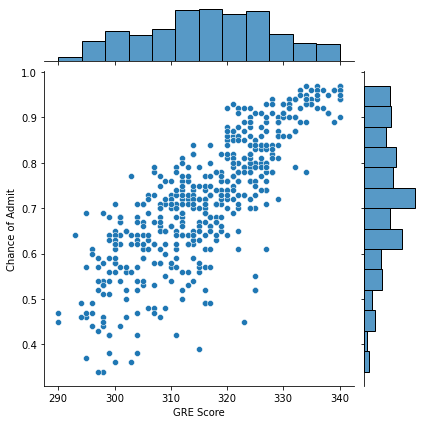

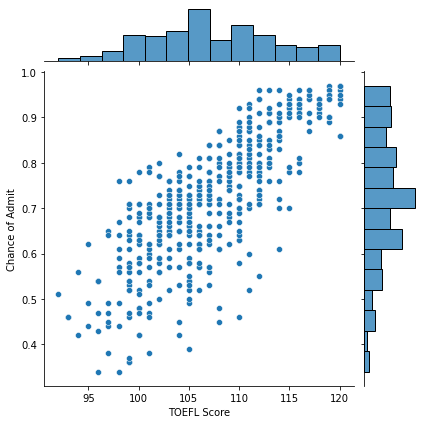

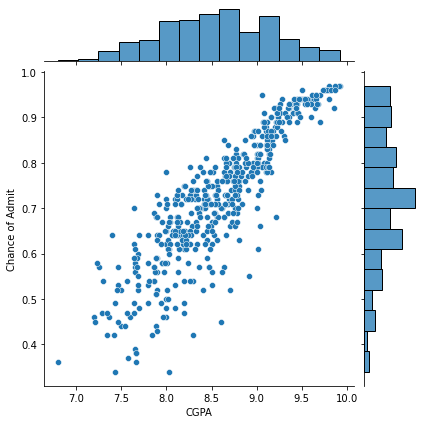

In [193]:
for var in cts_vars:
    sns.jointplot(df[var] , df['Chance of Admit'])
    plt.show()

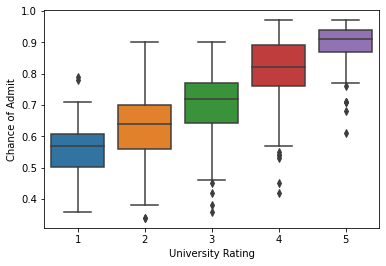

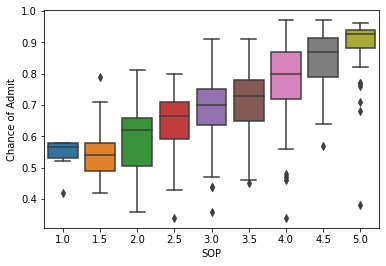

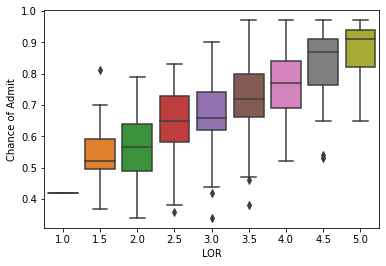

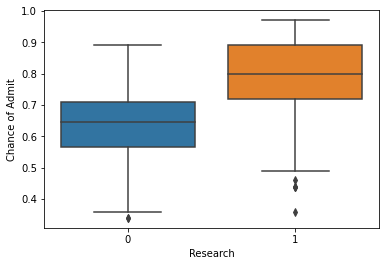

In [194]:
for var in ord_vars:
    sns.boxplot(df[var] , df['Chance of Admit'])
    plt.show()

# Conclusions from Bivariate analysis

### 1. continuous features ('GRE Score,' 'TOEFL Score', 'CGPA') seems to have a linear relationship with y-variable (Chance of Admit))
### 2. ordinal features ('University Rating', 'SOP', 'LOR', 'Research')- their median value seems to have an increasing relation with y-variable
### 3. There are few outliers in ordinal features- despite having higher values, the chances of admission is still low. It would be interesting to see what contributes these points.




# Relation between input features

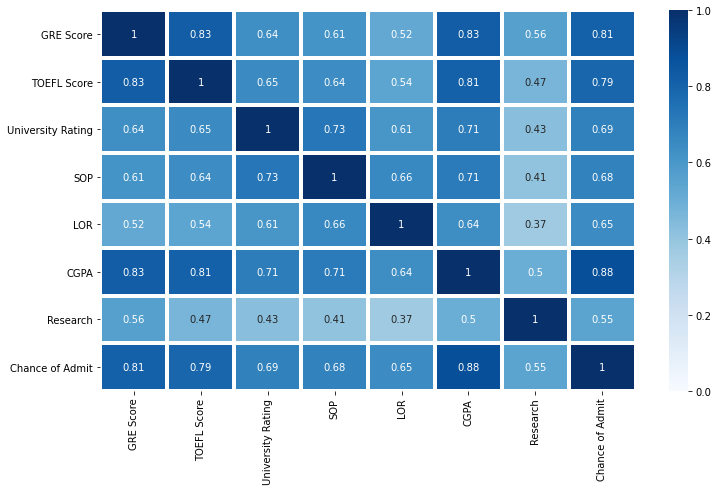

In [195]:
cormap = df.corr(method='pearson')
plt.figure(figsize=(12,7))
sns.heatmap(cormap,annot=True,linewidth =3,cmap='Blues', vmax=0,vmin=1)
plt.show()

### We observe strong positive correlation among 'GRE Score', 'TOEFL Score' and 'CGPA'. We need to check how each affects our evaluation metrics
### Also, high pearson correlation coefficient value between input features and y-variable (chance of admission) indicates presence of linear relation between them. 


### Some discussion on y_variable

In [196]:
df['Chance of Admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

<AxesSubplot:xlabel='Chance of Admit', ylabel='Density'>

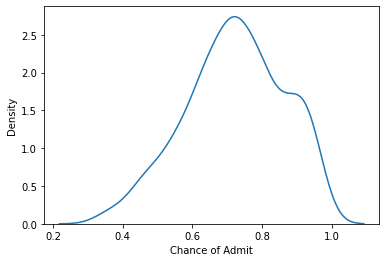

In [197]:
sns.kdeplot(df['Chance of Admit'])

### y-variable (Chance of Admit) almost follows a normal distribution with minor left skewness

# Section 2: Modeling and assumptions

### The problem we are trying to solve is to come up with a model that predicts chances of Admission given various input features.
### Also, as per EDA above, we can see there is Linear dependency of y-variable with input features.


### Lets think along the lines of assumptions of linear regression model:

### assumption1: y-variable has linear relation with features. We can see from above correlation plot, that "chance of Admit" shows strong correlation coefficienct with input features.
### assumption2: Multicolinearity: as we have seen, 'GRE Score', 'TOEFL Score' and 'CGPA' shows strong positive correlation. We can check by vif score and also by taking one feature at a time in the model and seeing how the evaluation metric improves.



### checking vif

In [198]:
df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [199]:
vif = pd.DataFrame()
X_t = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,1308.06
1,TOEFL Score,1215.95
5,CGPA,950.82
3,SOP,35.27
4,LOR,30.91
2,University Rating,20.93
6,Research,2.87


### as we can see 'GRE Score', 'TOEFL Score' and 'CGPA' has got larger vif values. 

In [200]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y = df['Chance of Admit'].values

In [201]:
df['Chance of Admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

In [202]:
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

In [203]:
X_scaled[1]

array([ 0.66714832, -0.03160087,  0.77558214,  0.63231549,  1.09894429,
        0.48585943,  0.88640526])

### using scaled features to build the model

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size = 0.3, random_state = 123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((350, 7), (150, 7), (350,), (150,))

In [205]:
lr_model=LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [206]:
lr_model.score(X_train, y_train)

0.8203124319718277

In [207]:
lr_model.score(X_test, y_test)

0.8222583019921643

In [208]:
lr_model.coef_

array([0.02730659, 0.01692848, 0.00413289, 0.0009643 , 0.01474799,
       0.06798212, 0.01180739])

In [209]:
y_hat = lr_model.predict(X_test)

In [210]:
def adj_r2(r2,n,d):
    ans = 1- ((1-r2)*(n-1)/(n-d-1))
    return ans

In [211]:
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_hat))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_hat))
print("adjusted r2: %.4f" % adj_r2(r2_score(y_test, y_hat), X_test.shape[0], X_test.shape[1]))

Mean squared error: 0.0039
Coefficient of determination: 0.8223
adjusted r2: 0.8135


In [212]:
### Above metrics is calculated for Training dataset as well to check overfitting. 

print("Mean squared error: %.4f" % mean_squared_error(y_train, lr_model.predict(X_train)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_train, lr_model.predict(X_train)))
print("adjusted r2: %.4f" % adj_r2(r2_score(y_train, lr_model.predict(X_train)),X_train.shape[0],X_train.shape[1]))



Mean squared error: 0.0034
Coefficient of determination: 0.8203
adjusted r2: 0.8166


### the model doesn't seem to overfit data. 

# Error analysis

In [213]:
error = y_test - y_hat

In [214]:
y_hat[y_hat>1]

array([], dtype=float64)

<AxesSubplot:ylabel='Density'>

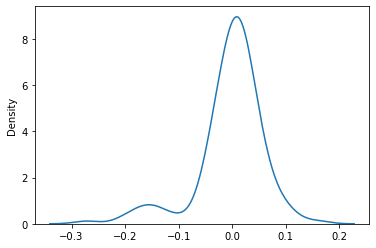

In [215]:
sns.kdeplot(error)

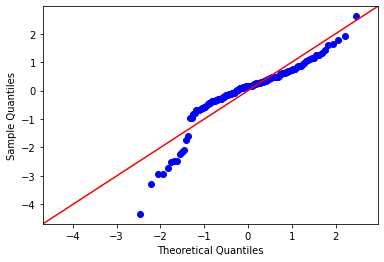

In [216]:
sm.qqplot(error, stats.norm, fit=True, line="45") 
plt.show()

### QQ plot and distribution plot for error seems to have long left tail. This might be due to outliers present in the data. 
### We need further validation (domain information) to confirm these points as outliers.


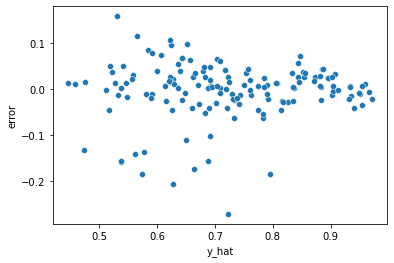

In [217]:
sns.scatterplot(y_hat, error)
plt.xlabel('y_hat')
plt.ylabel('error')
plt.show()



### error analysis:
### Assumption 3: The error seems to be normally distributed with mean value around 0. But it seems there are few outliers in data where predictions are greater than y-values. 
### Assumption 4: If we exclude negative values of error,there seems to little hetroskadasticity in the data. There is slight funnel type beahviour towards starting of error-y-hat curve.
### Though it is very negligible.



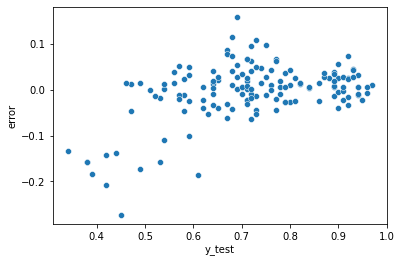

In [218]:
sns.scatterplot(y_test, error)
plt.xlabel('y_test')
plt.ylabel('error')
plt.show()

### similar beahviour observed for y_test vs error plot.

In [219]:
df_output = pd.DataFrame()
df_output['serial_num_lst'] = serial_num_lst
df_output = pd.concat([df_output, df], axis=1)
df_output['predictions'] = lr_model.predict(X_scaled)


In [220]:
df_output.head()

,serial_num_lst,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,predictions
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.954253
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.803897
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.657747
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.748904
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.637394


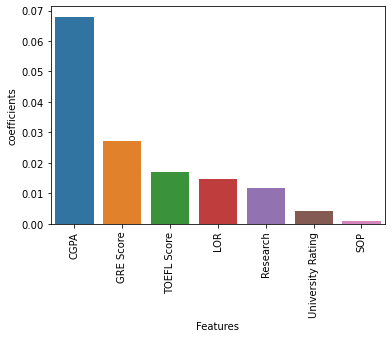

In [221]:
imp_feats = pd.DataFrame()
imp_feats['Features'] = X_t.columns
imp_feats['coefficients'] = lr_model.coef_

imp_feats= imp_feats.sort_values(by = ['coefficients'],ascending=False)
sns.barplot(x = 'Features', y ='coefficients',data = imp_feats)
plt.xticks(rotation=90)
plt.show()

### Polynomial feature : Lets try polynomial regression as it seems CGPA appears to have power relation with Y variable. 

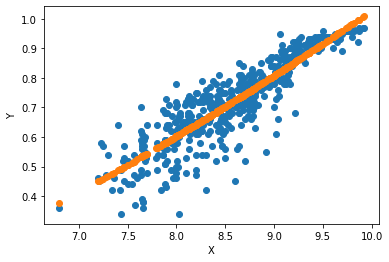

0.7791776977550845

In [222]:
Xdata = X['CGPA'].values.reshape(-1,1)
X_deg2 = np.hstack([Xdata, Xdata**0.5])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)
fig = plt.figure()
plt.scatter(Xdata, y, label="samples")
plt.scatter(Xdata, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
display(model_deg2.score(X_deg2, y))

### Adding polynomial features doesnt provide improvement to r-sqaure value

# Section 3:recommendation and insights

### Based on above analysis, we can conclude following:

### 1. Out of given features, CGPA is very important to drive the chance of admissions
### 2. Other features like GRE score and TOEFL Score - both seems to be almost equally important
### 3. SOP (Statement of Purpose) doesn't seem to be important, however Letter of Recommendation seems to be important feature.
### 4. Overall, by trying different combinations of features, we got adjusted- r-sq value of ~82%. 

### The findings seem to be consistent with real-world scenarios as important features to get admission are CGPA,GRE & TOEFL score.
### Also, for example, If there is Letter of recommendation from renowned professors are there, it increases the chance of admissions. 
### And so is Prior Research experience. A good research experience adds value to the application. 
